In [1]:
import pandas as pd
import geopandas
import fiona
from matplotlib import pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
indicator_data=pd.read_csv("indicator_data.csv",encoding="latin_1")
processed_data=pd.read_csv("processed_data.csv",encoding="latin_1")

C:\Users\chenl\AppData\Local\Temp\ipykernel_16312\2365895264.py:2: DtypeWarning: Columns (13,17,19,20,21,26,29,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,120,123,125,127,128,129,131,132,133,134,135,136,137,141,142,143,144,145,146,147,150,151,152,153,154,155,157,158,159,160,162,163,164,165,166,167,168,169,170,171,172,173,174,177,179,180,181,182,183,184,185,186,188,189,190,191,192,204,205,208,209,210,211,212,213,214,215,216,219,220,222,230,232,240,242,250,257,258,259,260,261,262,263,264,265,266,269,270,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374

In [3]:
indicator_processed=pd.DataFrame(indicator_data,columns=["hfias_status","hh_size_members","land_cultivated_ha"]) #this is the column that we are going to use
processed__data=pd.DataFrame(processed_data,columns=["id_country","country","id_proj"])
#select the using data columns in processed_data

In [4]:
food_safety = pd.concat([processed__data,indicator_processed], axis=1)#combine these two data together
food_safety_tz=food_safety.loc[food_safety['id_country'] == 'tz']#select the Tanzania from the data
food_safety_tz["id_proj"].unique() #see the projects' kinds 

array(['cfm', 'cra', 'glv', 'srl'], dtype=object)

In [5]:
class_mapping = {'food_secure':1, 'mildly_fi':2,'moderately_fi':3,'severely_fi':4} #convert string to number
food_safety_tz['hfias_status'] = food_safety_tz['hfias_status'].map(class_mapping)

C:\Users\chenl\AppData\Local\Temp\ipykernel_16312\3071095337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_safety_tz['hfias_status'] = food_safety_tz['hfias_status'].map(class_mapping)


In [6]:
food_safety_tz=food_safety_tz.dropna(subset=['land_cultivated_ha'])#drop the nan value in the land_cultivated_ha column
food_safety_tz=food_safety_tz.loc[food_safety_tz['land_cultivated_ha'] >0] #select the value >0
food_safety_tz=food_safety_tz.dropna(subset=['hh_size_members'])#drop the nan value in the hh_size_number column
food_safety_tz=food_safety_tz.loc[food_safety_tz['hh_size_members'] >0] #select the value >0

## 1.Visualizing through matplotlib boxplot using plt.boxplot().
## 2.Using 1.5 IQR rule.

In [7]:
land_cultivated_data=food_safety_tz['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members=food_safety_tz['hh_size_members']
hfias = food_safety_tz['hfias_status']

In [11]:
land_cultivated_data.describe()

count    2710.000000
mean        4.907408
std        28.507769
min         0.080000
25%         1.000000
50%         2.000000
75%         4.000000
max       800.000000
Name: land_cultivated_ha, dtype: float64

In [72]:
hh_size_members.describe()

count    2710.000000
mean        6.801845
std         5.545762
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        64.000000
Name: hh_size_members, dtype: float64

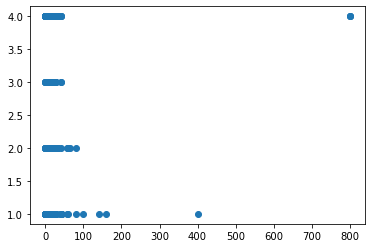

In [68]:
plt.scatter(land_cultivated_data,hfias) # the relationship before cleaning the data

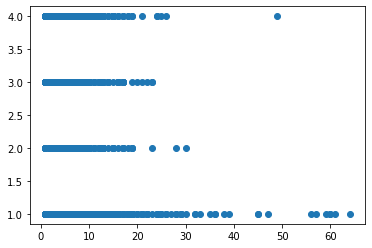

In [94]:
plt.scatter(hh_size_members,hfias) # the relationship before cleaning the data

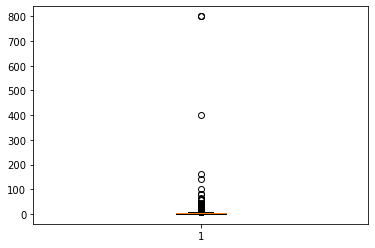

In [55]:
fig1, ax1 = plt.subplots()
plt.boxplot(land_cultivated_data)
plt.show()

In [88]:
# finding the 1st quartile
q1 = np.quantile(land_cultivated_data, 0.01)

# finding the 3rd quartile
q3 = np.quantile(land_cultivated_data, 0.99)
#med = np.median(land_cultivated_data)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3#+(1.5*iqr)
lower_bound = q1#-(1.5*iqr)
print(iqr, upper_bound, lower_bound)


39.07999999999883 39.279999999998836 0.2


In [89]:
land_cultivated_data_outliers = land_cultivated_data[(land_cultivated_data <= lower_bound) | (land_cultivated_data >= upper_bound)]

In [90]:
land_cultivated_data_outliers

28783      0.1
28786      0.2
28827      0.2
28828      0.1
28836      0.1
         ...  
30541     60.0
30546    100.0
30577     40.0
30578     40.0
30580     40.0
Name: land_cultivated_ha, Length: 89, dtype: float64

In [91]:
# finding the 1st quartile
q1 = np.quantile(hh_size_members, 0.01)

# finding the 3rd quartile
q3 = np.quantile(hh_size_members, 0.99)
#med = np.median(land_cultivated_data)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3#+(1.5*iqr)
lower_bound = q1#-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

27.0 28.0 1.0


In [92]:
hh_size_members_outliers = hh_size_members[(hh_size_members <= lower_bound) | (hh_size_members >= upper_bound)]

In [93]:
hh_size_members_outliers

28776    1
28808    1
28866    1
28874    1
28902    1
        ..
31630    1
31632    1
31635    1
31642    1
31645    1
Name: hh_size_members, Length: 190, dtype: int64

In [22]:
# finding the 1st quartile
q1 = np.quantile(hh_size_members, 0.25)

# finding the 3rd quartile
q3 = np.quantile(hh_size_members, 0.75)
#med = np.median(land_cultivated_data)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

4.0 14.0 -2.0


In [24]:
import numpy as np
import pandas as pd

def detect_outliers(data,threshold=3):
    mean_d = np.mean(data)
    std_d = np.std(data)
    outliers = []
    
    for y in land_cultivated_data:
        z_score= (y - mean_d)/std_d 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [25]:
import numpy as np
import pandas as pd

def detect_outliers_1(data,threshold=3):
    mean_d = np.mean(data)
    std_d = np.std(data)
    outliers = []
    
    for y in hh_size_members:
        z_score= (y - mean_d)/std_d 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [26]:
detect_outliers(land_cultivated_data,threshold=3)

[140.0, 800.0, 800.0, 800.0, 160.0, 400.0, 100.0]

In [27]:
detect_outliers_1(hh_size_members,threshold=3)

[45,
 47,
 35,
 29,
 60,
 36,
 64,
 28,
 49,
 25,
 25,
 26,
 30,
 38,
 36,
 56,
 60,
 39,
 24,
 33,
 26,
 59,
 24,
 25,
 57,
 29,
 30,
 25,
 32,
 26,
 28,
 24,
 29,
 27,
 29,
 32,
 24,
 28,
 45,
 28,
 26,
 24,
 24,
 61]

In [28]:
hh_size=detect_outliers_1(hh_size_members,threshold=3)

In [29]:
len(hh_size)

44

In [80]:
hh_size

[45,
 47,
 35,
 29,
 60,
 36,
 64,
 28,
 49,
 25,
 25,
 26,
 30,
 38,
 36,
 56,
 60,
 39,
 24,
 33,
 26,
 59,
 24,
 25,
 57,
 29,
 30,
 25,
 32,
 26,
 28,
 24,
 29,
 27,
 29,
 32,
 24,
 28,
 45,
 28,
 26,
 24,
 24,
 61]

In [57]:
outliers = land_cultivated_data[(land_cultivated_data <= lower_bound) | (land_cultivated_data >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:28940    14.0
28977    10.0
28978    21.0
29119     9.6
29160    12.0
         ... 
31571    13.2
31578    20.0
31605    10.0
31625     9.6
31628    12.0
Name: land_cultivated_ha, Length: 234, dtype: float64


In [102]:
land_cultivated_data=land_cultivated_data[land_cultivated_data<upper_bound]

In [8]:
food_safety_tz=food_safety_tz.loc[(food_safety_tz['land_cultivated_ha'] >0)&(food_safety_tz['land_cultivated_ha'] < 100) ] #select the value based on the previous outliers

In [9]:
food_safety_tz=food_safety_tz.loc[(food_safety_tz['hh_size_members'] > 0)&(food_safety_tz['hh_size_members'] < 24) ] #select the value based on the previous outliers

In [100]:
upper_bound=24

In [ ]:
food_safety_tz=food_safety_tz.loc[(food_safety_tz['land_cultivated_ha'] >0)&(food_safety_tz['land_cultivated_ha'] < 100) ] #select the value based on the previous outliers

In [ ]:
food_safety_tz=food_safety_tz.loc[(food_safety_tz['land_cultivated_ha'] >0)&(food_safety_tz['land_cultivated_ha'] < upper_bound) ] #select the value based on the previous outliers

In [101]:
outliers_1 = hh_size_members[hh_size_members >= upper_bound]
print('The following are the outliers in the boxplot:{}'.format(outliers_1))

The following are the outliers in the boxplot:29026    45
29237    47
29450    35
29542    29
29544    60
29568    36
29664    64
29813    28
29864    49
29914    25
29978    25
29979    26
29982    30
30018    38
30125    36
30343    56
30352    60
30381    39
30382    24
30392    33
30441    26
30476    59
30481    24
30482    25
30518    57
30519    29
30536    30
30543    25
30546    32
30550    26
30581    28
30591    24
30600    29
30601    27
30602    29
30604    32
30713    24
30728    28
30730    45
30732    28
30802    26
30873    24
31188    24
31464    61
Name: hh_size_members, dtype: int64


In [32]:
#outliers.count()

NameError: name 'outliers' is not defined

## Remove outliers of land_culitivated_data

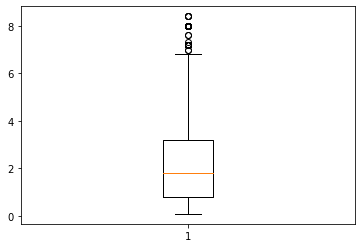

In [59]:
# boxplot of data within the whisker
land_cultivated_data = land_cultivated_data[(land_cultivated_data > lower_bound) & (land_cultivated_data < upper_bound)]
fig1, ax1 = plt.subplots()
plt.boxplot(land_cultivated_data)
plt.show()

In [13]:
food_safety_tz=food_safety_tz.loc[(food_safety_tz['land_cultivated_ha'] >= lower_bound)&(food_safety_tz['land_cultivated_ha'] <= upper_bound) ] #select the value based on the previous outliers

In [14]:
food_safety_tz

,id_country,country,id_proj,hfias_status,hh_size_members,land_cultivated_ha
28766,tz,tanzania,cfm,1,4,0.8
28767,tz,tanzania,cfm,1,10,0.8
28768,tz,tanzania,cfm,1,5,0.8
28769,tz,tanzania,cfm,1,11,1.2
28770,tz,tanzania,cfm,4,6,0.8
...,...,...,...,...,...,...
31641,tz,tanzania,srl,1,3,2.8
31642,tz,tanzania,srl,4,1,3.6
31643,tz,tanzania,srl,4,4,4.0
31644,tz,tanzania,srl,4,2,2.8


## Remove outliers of hh_size_members

In [10]:
land_cultivated_data=food_safety_tz['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias = food_safety_tz['hfias_status']
hh_size_members=food_safety_tz['hh_size_members']

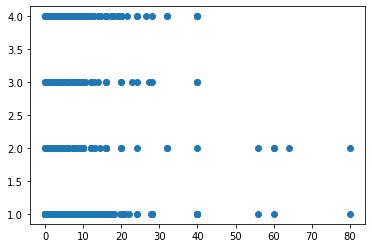

In [11]:
plt.scatter(land_cultivated_data,hfias) # the relationship after cleaning the data

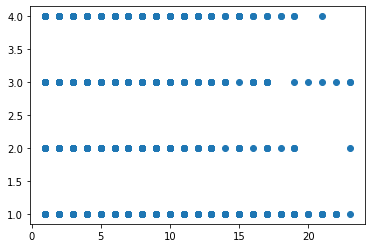

In [12]:
plt.scatter(hh_size_members,hfias) # the relationship before cleaning the data

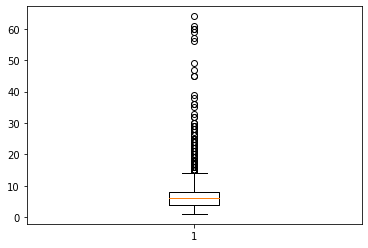

In [60]:
fig1, ax1 = plt.subplots()
plt.boxplot(hh_size_members)
plt.show()

In [36]:
# finding the 1st quartile
q1 = np.quantile(hh_size_members, 0.25)

# finding the 3rd quartile
q3 = np.quantile(hh_size_members, 0.75)
med = np.median(hh_size_members)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)


4.0 14.0 -2.0


In [37]:
outliers = hh_size_members[(hh_size_members<= lower_bound) | (hh_size_members >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:28815    14
28979    16
29015    17
29026    45
29079    21
         ..
31154    16
31186    14
31188    24
31195    14
31464    61
Name: hh_size_members, Length: 195, dtype: int64


In [38]:
outliers.count()

195

In [39]:
outliers = hh_size_members[(hh_size_members <= lower_bound) | (hh_size_members >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:28815    14
28979    16
29015    17
29026    45
29079    21
         ..
31154    16
31186    14
31188    24
31195    14
31464    61
Name: hh_size_members, Length: 195, dtype: int64


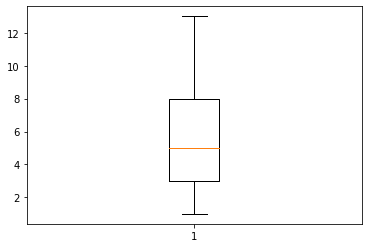

In [42]:
# boxplot of data within the whisker
hh_size_members = hh_size_members[(hh_size_members > lower_bound) & (hh_size_members < upper_bound)]
fig1, ax1 = plt.subplots()
plt.boxplot(hh_size_members)
plt.show()

In [21]:
food_safety_tz=food_safety_tz.loc[(food_safety_tz['hh_size_members'] > lower_bound)&(food_safety_tz['hh_size_members'] < upper_bound) ] #select the value based on the previous outliers

In [22]:
land_cultivated_data=food_safety_tz['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias = food_safety_tz['hfias_status']
hh_size_members=food_safety_tz['hh_size_members']

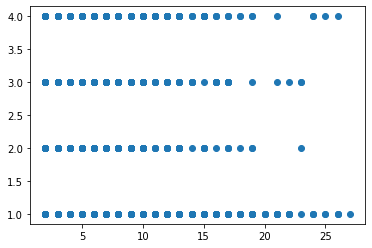

In [23]:
plt.scatter(hh_size_members,hfias) # the relationship before cleaning the data

                    hfias_status  hh_size_members  land_cultivated_ha
hfias_status            1.000000        -0.156807            0.017547
hh_size_members        -0.156807         1.000000            0.223451
land_cultivated_ha      0.017547         0.223451            1.000000


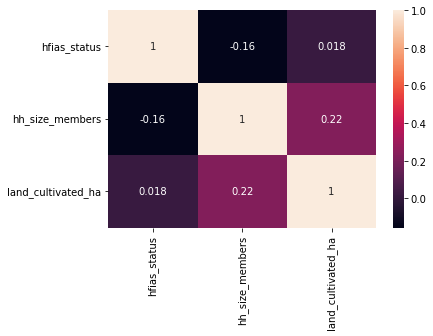

In [13]:
df_food = pd.DataFrame(food_safety_tz,columns=['hfias_status','hh_size_members','land_cultivated_ha'])
corrMatrix = df_food.corr()
print (corrMatrix) 
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [19]:
food_safety_tz

,id_country,country,id_proj,hfias_status,hh_size_members,land_cultivated_ha
28766,tz,tanzania,cfm,1,4,0.8
28767,tz,tanzania,cfm,1,10,0.8
28768,tz,tanzania,cfm,1,5,0.8
28769,tz,tanzania,cfm,1,11,1.2
28770,tz,tanzania,cfm,4,6,0.8
...,...,...,...,...,...,...
31641,tz,tanzania,srl,1,3,2.8
31642,tz,tanzania,srl,4,1,3.6
31643,tz,tanzania,srl,4,4,4.0
31644,tz,tanzania,srl,4,2,2.8


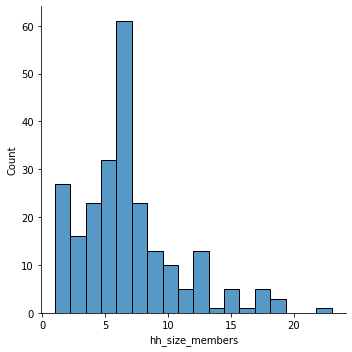

In [16]:
sns.displot(food_safety_tz.loc[food_safety_tz['hfias_status']==2] , x="hh_size_members")

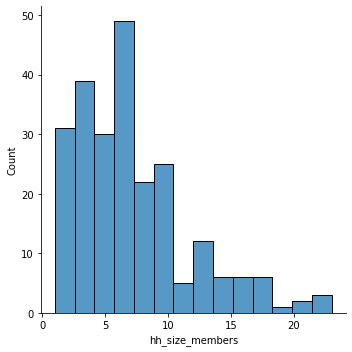

In [17]:
sns.displot(food_safety_tz.loc[food_safety_tz['hfias_status']==3] , x="hh_size_members")

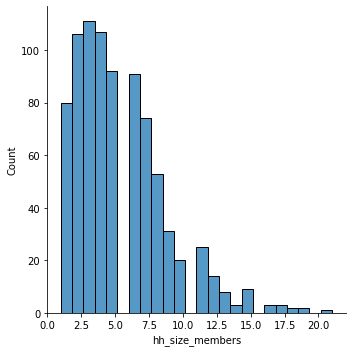

In [18]:
sns.displot(food_safety_tz.loc[food_safety_tz['hfias_status']==4] , x="hh_size_members")

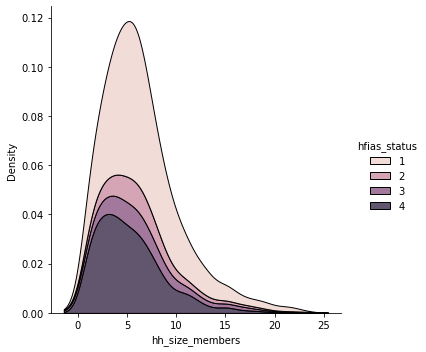

In [40]:
sns.displot(food_safety_tz, x="hh_size_members", hue="hfias_status", kind="kde", multiple="stack")

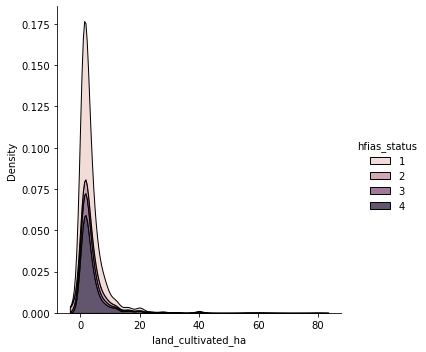

In [48]:
sns.displot(food_safety_tz, x="land_cultivated_ha", hue="hfias_status", kind="kde", multiple="stack")

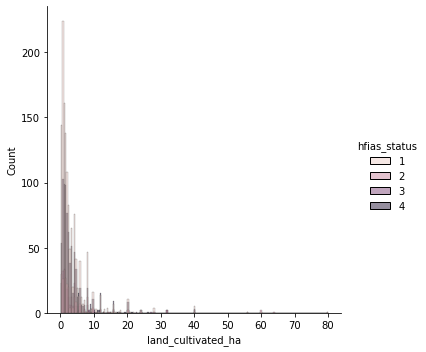

In [41]:
sns.displot(food_safety_tz, x="land_cultivated_ha", hue="hfias_status")

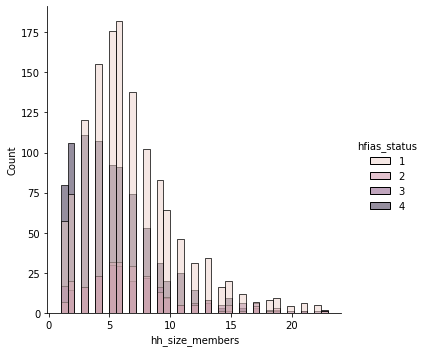

In [47]:
sns.displot(food_safety_tz, x="hh_size_members", hue="hfias_status")

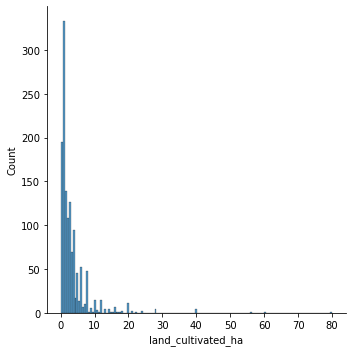

In [42]:
sns.displot(food_safety_tz.loc[food_safety_tz['hfias_status']==1] , x="land_cultivated_ha")

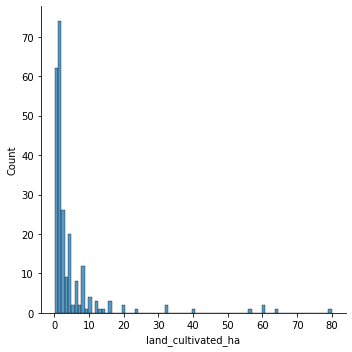

In [43]:
sns.displot(food_safety_tz.loc[food_safety_tz['hfias_status']==2] , x="land_cultivated_ha")

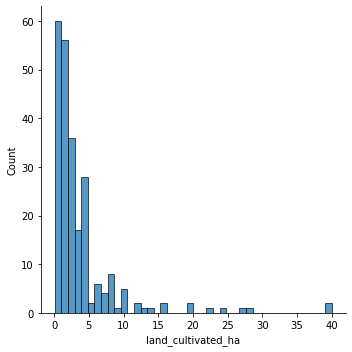

In [44]:
sns.displot(food_safety_tz.loc[food_safety_tz['hfias_status']==3] , x="land_cultivated_ha")

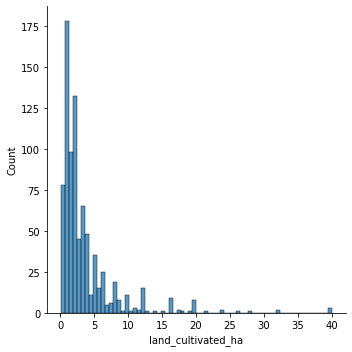

In [45]:
sns.displot(food_safety_tz.loc[food_safety_tz['hfias_status']==4] , x="land_cultivated_ha")

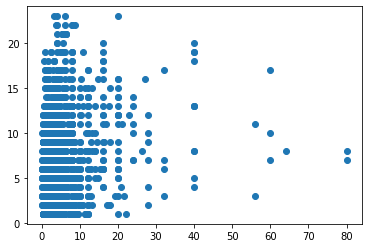

In [46]:
plt.scatter(land_cultivated_data,hh_size_members) # the relationship after cleaning the data

## Project CFM 

In [21]:
food_safety_cfm=food_safety_tz.loc[food_safety_tz['id_proj'] == 'cfm']#select the CFM from the data

In [22]:
land_cultivated_data_cfm=food_safety_cfm['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members_cfm=food_safety_cfm['hh_size_members']
hfias_hh_cfm = food_safety_cfm['hfias_status']

<AxesSubplot:>

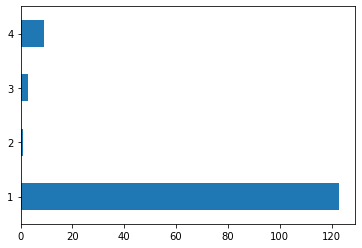

In [24]:
food_safety_cfm_count=food_safety_cfm['hfias_status'].value_counts()
food_safety_cfm_count.sort_index().plot(kind='barh')#plot the rankings

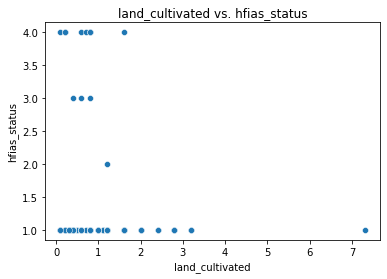

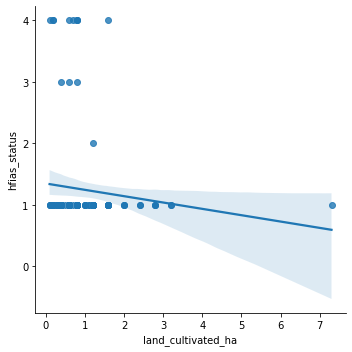

In [136]:
import seaborn as sns
ax=sns.scatterplot(x='land_cultivated_ha', y='hfias_status', data=food_safety_cfm);
ax.set_title("land_cultivated vs. hfias_status")
ax.set_xlabel("land_cultivated");
sns.lmplot(x='land_cultivated_ha', y='hfias_status', data=food_safety_cfm);

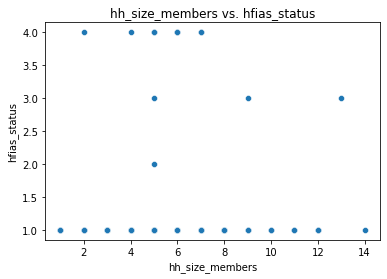

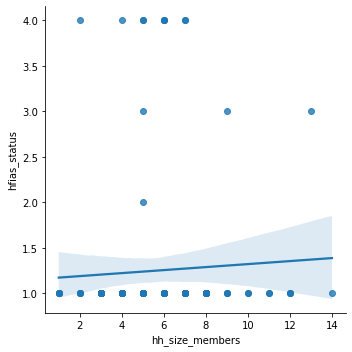

In [137]:
import seaborn as sns
ax1=sns.scatterplot(x='hh_size_members', y='hfias_status', data=food_safety_cfm);
ax1.set_title("hh_size_members vs. hfias_status")
ax.set_xlabel("hh_size_members");
sns.lmplot(x='hh_size_members', y='hfias_status', data=food_safety_cfm);

Text(0.5, 1.0, 'hfias_cfm')

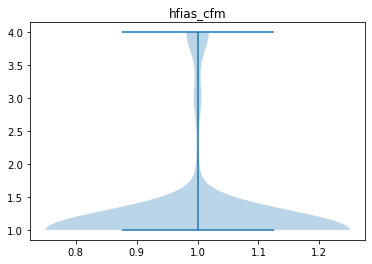

In [138]:
hfias_status_cfm = food_safety_cfm['hfias_status']
fig, ax = plt.subplots()
ax.violinplot([hfias_status_cfm])
ax.set_title('hfias_cfm')

                    hfias_status  hh_size_members  land_cultivated_ha
hfias_status            1.000000         0.050564           -0.107688
hh_size_members         0.050564         1.000000            0.233392
land_cultivated_ha     -0.107688         0.233392            1.000000


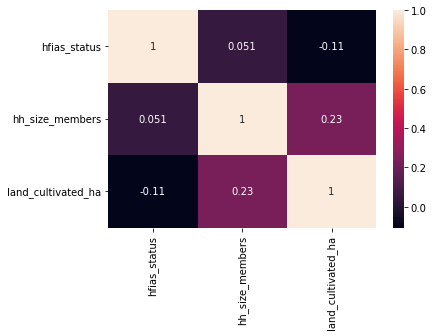

In [139]:
df_food_cfm = pd.DataFrame(food_safety_cfm,columns=['hfias_status','hh_size_members','land_cultivated_ha'])
corrMatrix_cfm = df_food_cfm.corr()
print (corrMatrix_cfm) 
sns.heatmap(corrMatrix_cfm, annot=True)
plt.show()

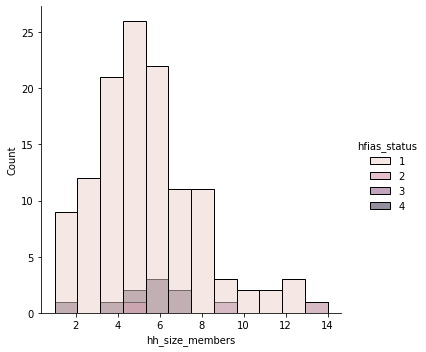

In [140]:
sns.displot(food_safety_cfm, x="hh_size_members",hue="hfias_status")

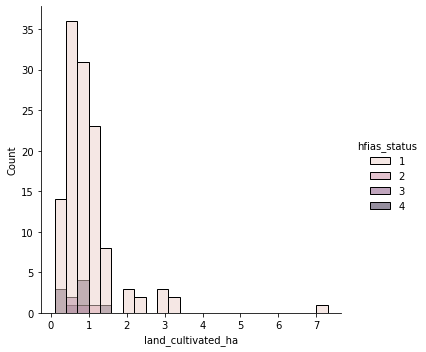

In [141]:
sns.displot(food_safety_cfm, x="land_cultivated_ha",hue="hfias_status")

C:\Users\chenl\Anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


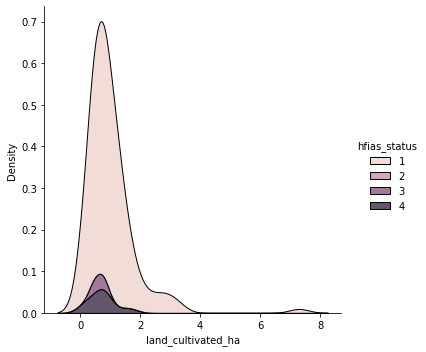

In [45]:
sns.displot(food_safety_cfm, x="land_cultivated_ha", hue="hfias_status", kind="kde", multiple="stack")

C:\Users\chenl\Anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


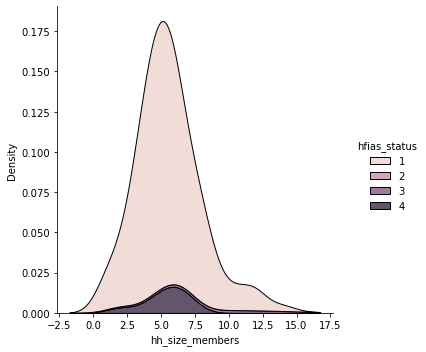

In [142]:
sns.displot(food_safety_cfm, x="hh_size_members", hue="hfias_status", kind="kde", multiple="stack")

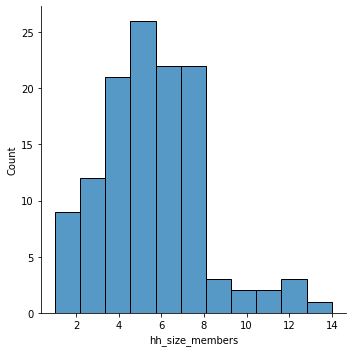

In [144]:
sns.displot(food_safety_cfm.loc[food_safety_cfm['hfias_status']==1] , x="hh_size_members")

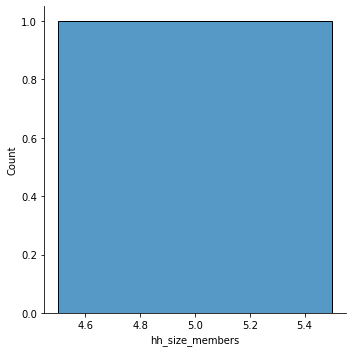

In [145]:
sns.displot(food_safety_cfm.loc[food_safety_cfm['hfias_status']==2] , x="hh_size_members")

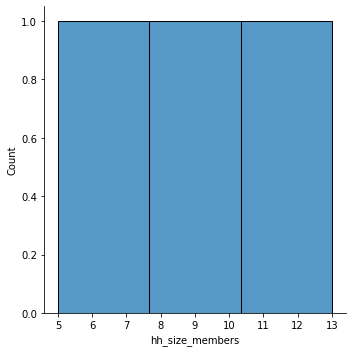

In [146]:
sns.displot(food_safety_cfm.loc[food_safety_cfm['hfias_status']==3] , x="hh_size_members")

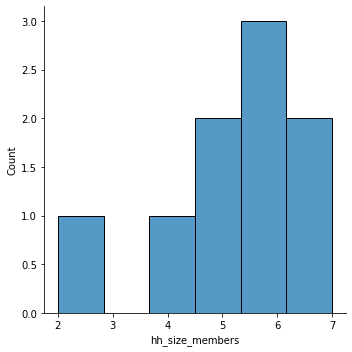

In [147]:
sns.displot(food_safety_cfm.loc[food_safety_cfm['hfias_status']==4] , x="hh_size_members")

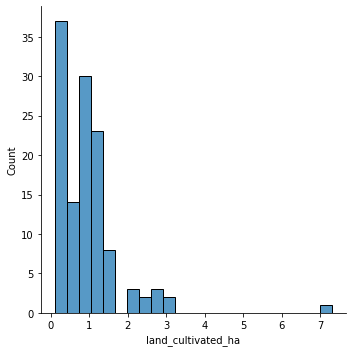

In [148]:
sns.displot(food_safety_cfm.loc[food_safety_cfm['hfias_status']==1] , x="land_cultivated_ha")

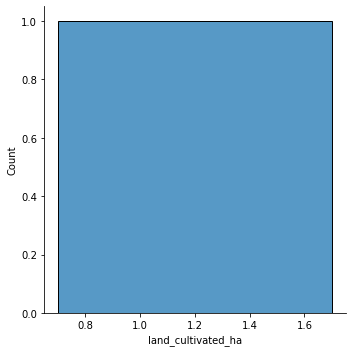

In [149]:
sns.displot(food_safety_cfm.loc[food_safety_cfm['hfias_status']==2] , x="land_cultivated_ha")

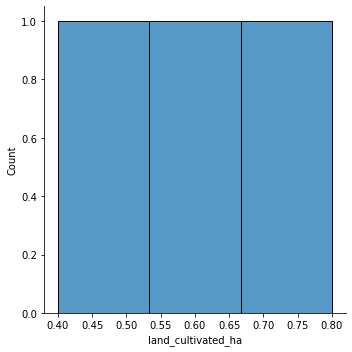

In [150]:
sns.displot(food_safety_cfm.loc[food_safety_cfm['hfias_status']==3] , x="land_cultivated_ha")

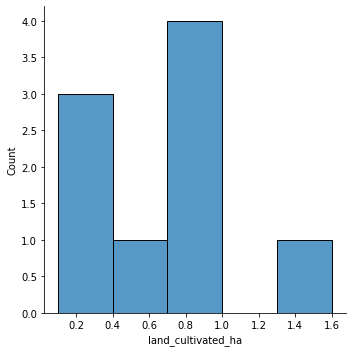

In [151]:
sns.displot(food_safety_cfm.loc[food_safety_cfm['hfias_status']==4] , x="land_cultivated_ha")

In [152]:
food_safety_cfm_1=food_safety_cfm

In [153]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.dummy import DummyRegressor # the baseline that we are going to use
import numpy as np #linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import math

In [154]:
food_safety_cfm_1.drop(columns='id_country', inplace=True)
food_safety_cfm_1.drop(columns='country', inplace=True)
food_safety_cfm_1.drop(columns='id_proj', inplace=True)
food_safety_cfm_1_1=pd.DataFrame(food_safety_cfm_1,columns=["hfias_status","hh_size_members"])
food_safety_cfm_1_2=pd.DataFrame(food_safety_cfm_1,columns=["hfias_status","land_cultivated_ha"]) 

C:\Users\chenl\AppData\Local\Temp\ipykernel_4352\1329835901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_safety_cfm_1.drop(columns='id_country', inplace=True)
C:\Users\chenl\AppData\Local\Temp\ipykernel_4352\1329835901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_safety_cfm_1.drop(columns='country', inplace=True)
C:\Users\chenl\AppData\Local\Temp\ipykernel_4352\1329835901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [155]:
target = "hfias_status" #Select the data that we are going to use in the dataset
X = food_safety_cfm_1_1.drop(columns=target)
y = food_safety_cfm_1_1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=42)
lr_model= LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train_lr = lr_model.predict(X_train)
print('Linear Regression - Training Metrics')
print('MAE:', mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', mean_squared_error(y_train, y_pred_train_lr))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_pred_train_lr)))
print('R2:', cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=-1).mean())

Linear Regression - Training Metrics
MAE: 0.07116920842411043
MSE: 0.035584604212055185
RMSE: 0.18863881947270342
R2: -0.040000000000000036


In [156]:
target = "hfias_status" #Select the data that we are going to use in the dataset
X = food_safety_cfm_1_2.drop(columns=target)
y = food_safety_cfm_1_2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=42)
lr_model= LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train_lr = lr_model.predict(X_train)
print('Linear Regression - Training Metrics')
print('MAE:', mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', mean_squared_error(y_train, y_pred_train_lr))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_pred_train_lr)))
print('R2:', cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=-1).mean())

Linear Regression - Training Metrics
MAE: 0.07046461200093088
MSE: 0.035232306000465494
RMSE: 0.18770270642818523
R2: -0.040000000000000036


In [157]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
target = "hfias_status" #Select the data that we are going to use in the dataset
X = food_safety_cfm_1_2.drop(columns=target)
y = food_safety_cfm_1_2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[:2])
regr.score(X_test, y_test)

-0.015675272076506985

## Project CRA

In [25]:
food_safety_cra=food_safety_tz.loc[food_safety_tz['id_proj'] == 'cra']#select the CRM project from the data

In [26]:
land_cultivated_data_cra=food_safety_cra['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members_cra=food_safety_cra['hh_size_members']
hfias_hh_cra = food_safety_cra['hfias_status']

<AxesSubplot:>

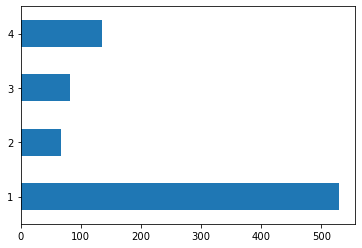

In [27]:
food_safety_cra_count=food_safety_cra['hfias_status'].value_counts()
food_safety_cra_count.sort_index().plot(kind='barh')#plot the rankings

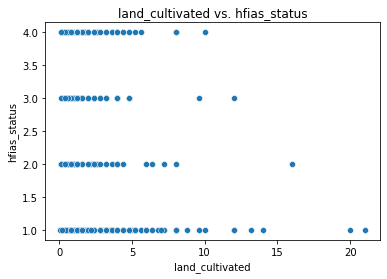

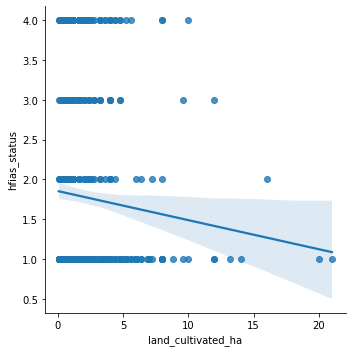

In [160]:
import seaborn as sns
ax=sns.scatterplot(x='land_cultivated_ha', y='hfias_status', data=food_safety_cra);
ax.set_title("land_cultivated vs. hfias_status")
ax.set_xlabel("land_cultivated");
sns.lmplot(x='land_cultivated_ha', y='hfias_status', data=food_safety_cra);

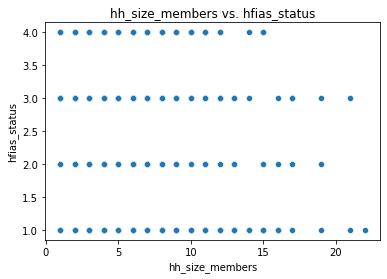

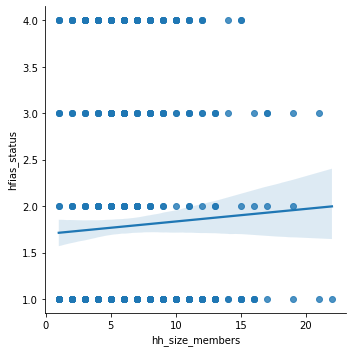

In [161]:
import seaborn as sns
ax1=sns.scatterplot(x='hh_size_members', y='hfias_status', data=food_safety_cra);
ax1.set_title("hh_size_members vs. hfias_status")
ax.set_xlabel("hh_size_members");
sns.lmplot(x='hh_size_members', y='hfias_status', data=food_safety_cra);

Text(0.5, 1.0, 'hfias_cra')

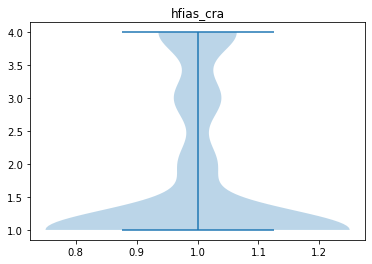

In [162]:
hfias_status_cra = food_safety_cra['hfias_status']
fig, ax = plt.subplots()
ax.violinplot([hfias_status_cra])
ax.set_title('hfias_cra')

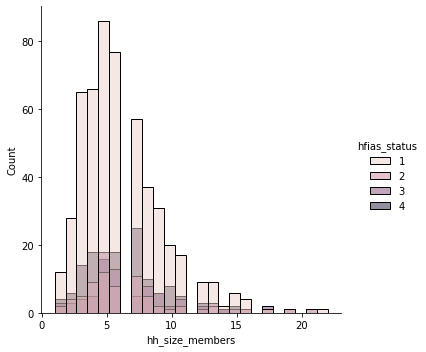

In [163]:
sns.displot(food_safety_cra, x="hh_size_members",hue="hfias_status")

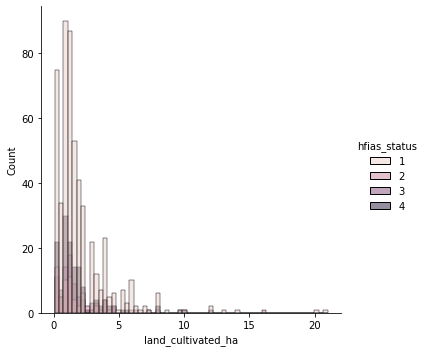

In [164]:
sns.displot(food_safety_cra, x="land_cultivated_ha",hue="hfias_status")

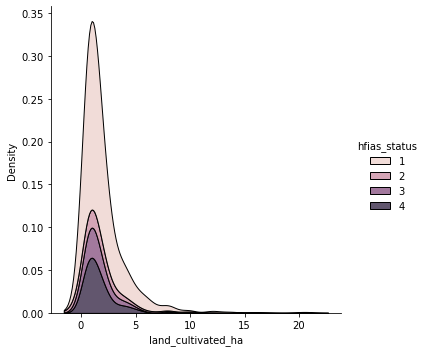

In [165]:
sns.displot(food_safety_cra, x="land_cultivated_ha", hue="hfias_status", kind="kde", multiple="stack")

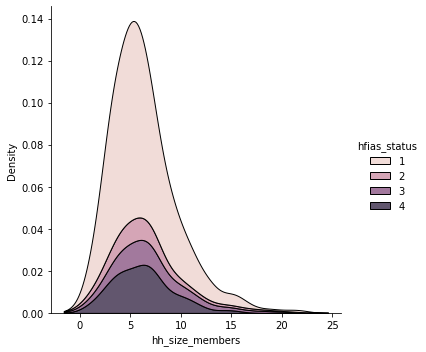

In [166]:
sns.displot(food_safety_cra, x="hh_size_members", hue="hfias_status", kind="kde", multiple="stack")

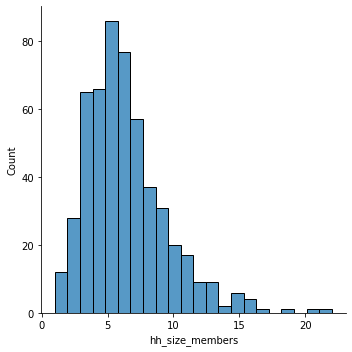

In [167]:
sns.displot(food_safety_cra.loc[food_safety_cra['hfias_status']==1] , x="hh_size_members")

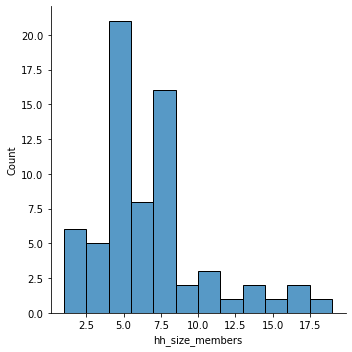

In [168]:
sns.displot(food_safety_cra.loc[food_safety_cra['hfias_status']==2] , x="hh_size_members")

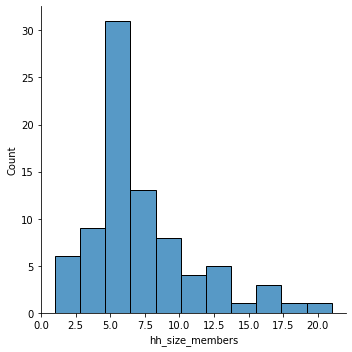

In [169]:
sns.displot(food_safety_cra.loc[food_safety_cra['hfias_status']==3] , x="hh_size_members")

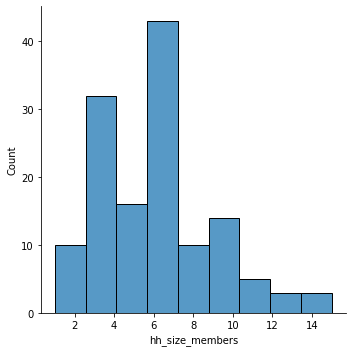

In [170]:
sns.displot(food_safety_cra.loc[food_safety_cra['hfias_status']==4] , x="hh_size_members")

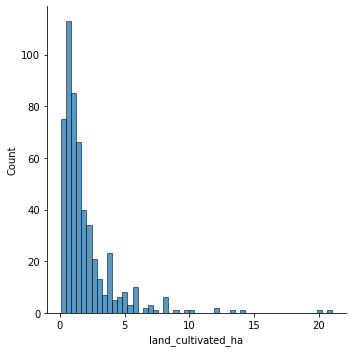

In [171]:
sns.displot(food_safety_cra.loc[food_safety_cra['hfias_status']==1] , x="land_cultivated_ha")

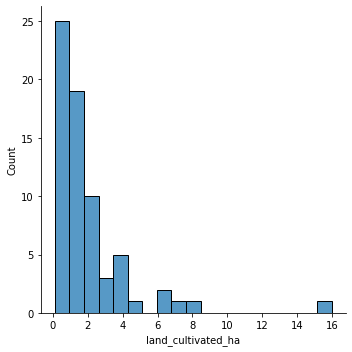

In [172]:
sns.displot(food_safety_cra.loc[food_safety_cra['hfias_status']==2] , x="land_cultivated_ha")

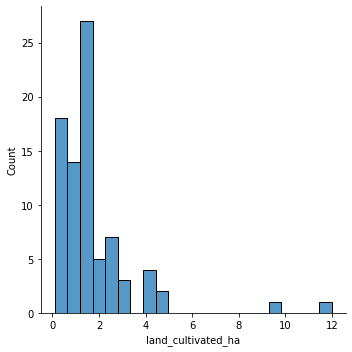

In [173]:
sns.displot(food_safety_cra.loc[food_safety_cra['hfias_status']==3] , x="land_cultivated_ha")

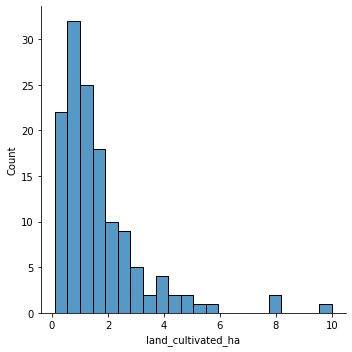

In [174]:
sns.displot(food_safety_cra.loc[food_safety_cra['hfias_status']==4] , x="land_cultivated_ha")

                    hfias_status  hh_size_members  land_cultivated_ha
hfias_status            1.000000         0.038125           -0.066090
hh_size_members         0.038125         1.000000            0.350325
land_cultivated_ha     -0.066090         0.350325            1.000000


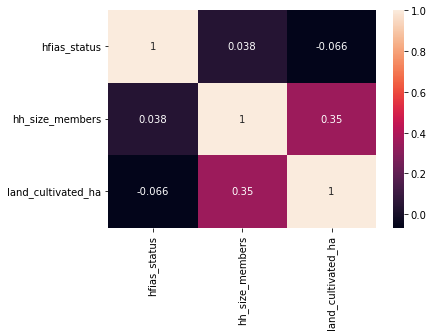

In [175]:
df_food_cra = pd.DataFrame(food_safety_cra,columns=['hfias_status','hh_size_members','land_cultivated_ha'])
corrMatrix_cra = df_food_cra.corr()
print (corrMatrix_cra) 
sns.heatmap(corrMatrix_cra, annot=True)
plt.show()

In [176]:
food_safety_cra_1=food_safety_cra

In [177]:
food_safety_cra_1.drop(columns='id_country', inplace=True)
food_safety_cra_1.drop(columns='country', inplace=True)
food_safety_cra_1.drop(columns='id_proj', inplace=True)
food_safety_cra_1_1=pd.DataFrame(food_safety_cra_1,columns=["hfias_status","hh_size_members"])
food_safety_cra_1_2=pd.DataFrame(food_safety_cra_1,columns=["hfias_status","land_cultivated_ha"]) 

C:\Users\chenl\AppData\Local\Temp\ipykernel_4352\3449325144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_safety_cra_1.drop(columns='id_country', inplace=True)
C:\Users\chenl\AppData\Local\Temp\ipykernel_4352\3449325144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_safety_cra_1.drop(columns='country', inplace=True)
C:\Users\chenl\AppData\Local\Temp\ipykernel_4352\3449325144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [178]:
target = "hfias_status" #Select the data that we are going to use in the dataset
X = food_safety_cra_1_1.drop(columns=target)
y = food_safety_cra_1_1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=42)
lr_model= LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train_lr = lr_model.predict(X_train)
print('Linear Regression - Training Metrics')
print('MAE:', mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', mean_squared_error(y_train, y_pred_train_lr))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_pred_train_lr)))
print('R2:', cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=-1).mean())

Linear Regression - Training Metrics
MAE: 0.985442005279369
MSE: 1.3513104274705303
RMSE: 1.1624587852782267
R2: -0.08951469184596479


In [179]:
target = "hfias_status" #Select the data that we are going to use in the dataset
X = food_safety_cra_1_2.drop(columns=target)
y = food_safety_cra_1_2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=42)
lr_model= LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train_lr = lr_model.predict(X_train)
print('Linear Regression - Training Metrics')
print('MAE:', mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', mean_squared_error(y_train, y_pred_train_lr))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_pred_train_lr)))
print('R2:', cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=-1).mean())

Linear Regression - Training Metrics
MAE: 0.9756715663806454
MSE: 1.3313266416089795
RMSE: 1.1538312881912067
R2: -0.08140449172768238


In [180]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
target = "hfias_status" #Select the data that we are going to use in the dataset
X = food_safety_cra_1_2.drop(columns=target)
y = food_safety_cra_1_2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[:2])
regr.score(X_test, y_test)

-0.021152303514562654

## Project GLV

In [28]:
food_safety_glv=food_safety_tz.loc[food_safety_tz['id_proj'] == 'glv']#select the GLV project from the data

In [29]:
land_cultivated_data_glv=food_safety_glv['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members_glv=food_safety_glv['hh_size_members']
hfias_hh_glv = food_safety_glv['hfias_status']

<AxesSubplot:>

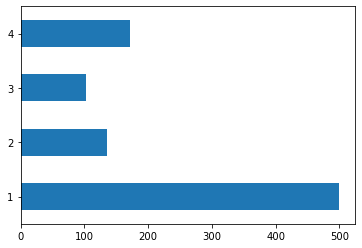

In [30]:
food_safety_glv_count=food_safety_glv['hfias_status'].value_counts()
food_safety_glv_count.sort_index().plot(kind='barh')#plot the rankings

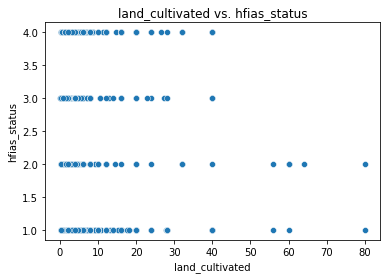

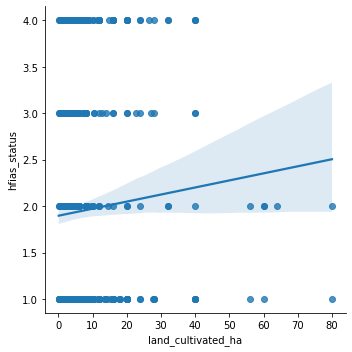

In [183]:
import seaborn as sns
ax=sns.scatterplot(x='land_cultivated_ha', y='hfias_status', data=food_safety_glv);
ax.set_title("land_cultivated vs. hfias_status")
ax.set_xlabel("land_cultivated");
sns.lmplot(x='land_cultivated_ha', y='hfias_status', data=food_safety_glv);

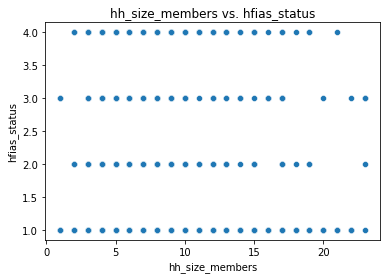

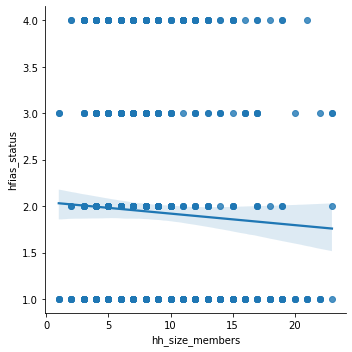

In [184]:
import seaborn as sns
ax1=sns.scatterplot(x='hh_size_members', y='hfias_status', data=food_safety_glv);
ax1.set_title("hh_size_members vs. hfias_status")
ax.set_xlabel("hh_size_members");
sns.lmplot(x='hh_size_members', y='hfias_status', data=food_safety_glv);

Text(0.5, 1.0, 'hfias_glv')

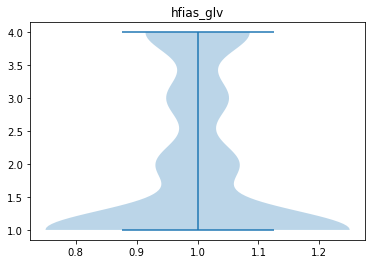

In [185]:
hfias_status_glv = food_safety_glv['hfias_status']
fig, ax = plt.subplots()
ax.violinplot([hfias_status_glv])
ax.set_title('hfias_glv')

                    hfias_status  hh_size_members  land_cultivated_ha
hfias_status            1.000000        -0.043872            0.055482
hh_size_members        -0.043872         1.000000            0.190314
land_cultivated_ha      0.055482         0.190314            1.000000


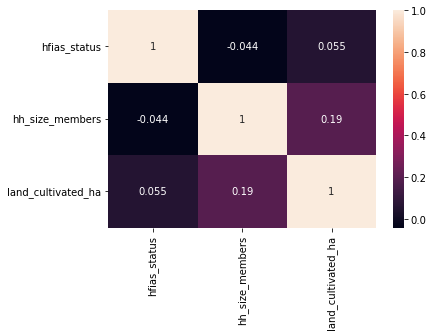

In [186]:
df_food_glv = pd.DataFrame(food_safety_glv,columns=['hfias_status','hh_size_members','land_cultivated_ha'])
corrMatrix_glv = df_food_glv.corr()
print (corrMatrix_glv) 
sns.heatmap(corrMatrix_glv, annot=True)
plt.show()

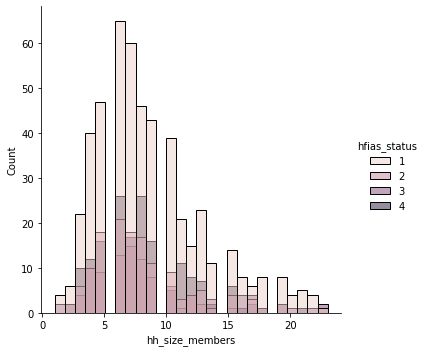

In [187]:
sns.displot(food_safety_glv, x="hh_size_members",hue="hfias_status")

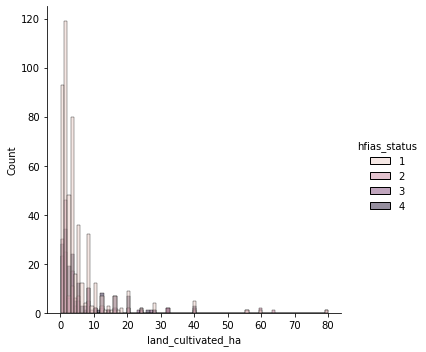

In [188]:
sns.displot(food_safety_glv, x="land_cultivated_ha",hue="hfias_status")

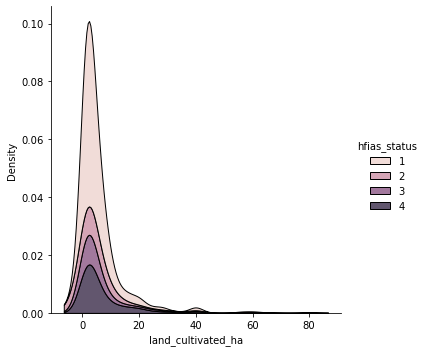

In [189]:
sns.displot(food_safety_glv, x="land_cultivated_ha", hue="hfias_status", kind="kde", multiple="stack")

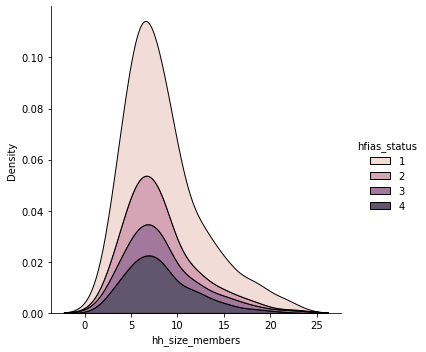

In [190]:
sns.displot(food_safety_glv, x="hh_size_members", hue="hfias_status", kind="kde", multiple="stack")

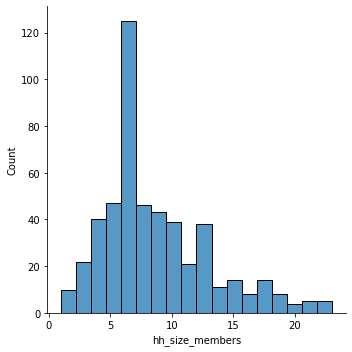

In [191]:
sns.displot(food_safety_glv.loc[food_safety_glv['hfias_status']==1] , x="hh_size_members")

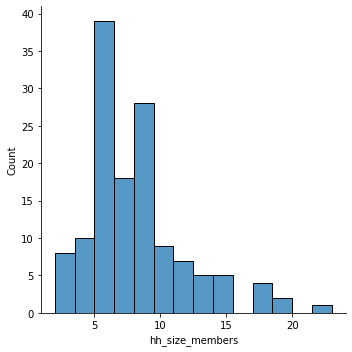

In [192]:
sns.displot(food_safety_glv.loc[food_safety_glv['hfias_status']==2] , x="hh_size_members")

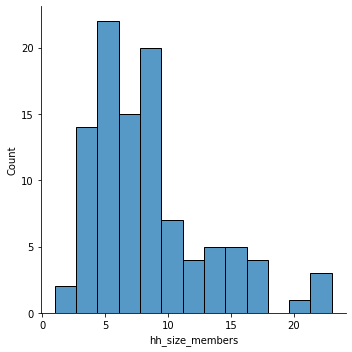

In [193]:
sns.displot(food_safety_glv.loc[food_safety_glv['hfias_status']==3] , x="hh_size_members")

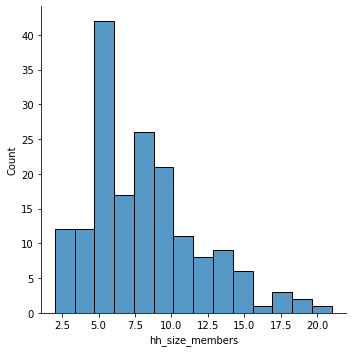

In [194]:
sns.displot(food_safety_glv.loc[food_safety_glv['hfias_status']==4] , x="hh_size_members")

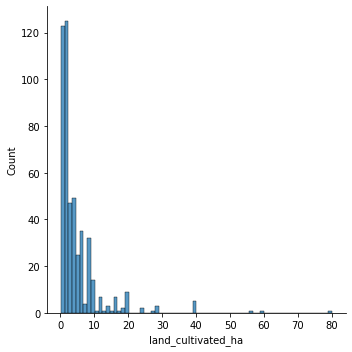

In [195]:
sns.displot(food_safety_glv.loc[food_safety_glv['hfias_status']==1] , x="land_cultivated_ha")

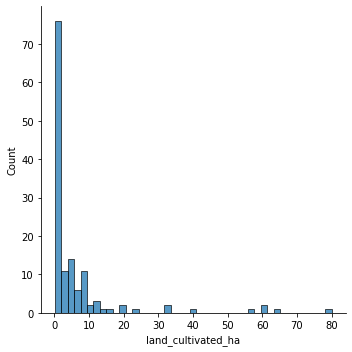

In [196]:
sns.displot(food_safety_glv.loc[food_safety_glv['hfias_status']==2] , x="land_cultivated_ha")

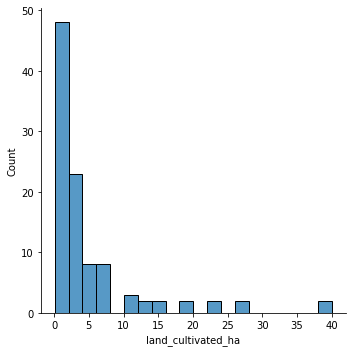

In [197]:
sns.displot(food_safety_glv.loc[food_safety_glv['hfias_status']==3] , x="land_cultivated_ha")

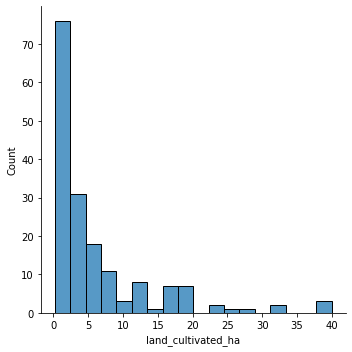

In [198]:
sns.displot(food_safety_glv.loc[food_safety_glv['hfias_status']==4] , x="land_cultivated_ha")

In [199]:
food_safety_glv_1=food_safety_glv

In [200]:
food_safety_glv_1.drop(columns='id_country', inplace=True)
food_safety_glv_1.drop(columns='country', inplace=True)
food_safety_glv_1.drop(columns='id_proj', inplace=True)
food_safety_glv_1_1=pd.DataFrame(food_safety_glv_1,columns=["hfias_status","hh_size_members"])
food_safety_glv_1_2=pd.DataFrame(food_safety_glv_1,columns=["hfias_status","land_cultivated_ha"]) 

C:\Users\chenl\AppData\Local\Temp\ipykernel_4352\1095005347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_safety_glv_1.drop(columns='id_country', inplace=True)
C:\Users\chenl\AppData\Local\Temp\ipykernel_4352\1095005347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_safety_glv_1.drop(columns='country', inplace=True)
C:\Users\chenl\AppData\Local\Temp\ipykernel_4352\1095005347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [201]:
target = "hfias_status" #Select the data that we are going to use in the dataset
X = food_safety_glv_1_1.drop(columns=target)
y = food_safety_glv_1_1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=42)
lr_model= LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train_lr = lr_model.predict(X_train)
print('Linear Regression - Training Metrics')
print('MAE:', mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', mean_squared_error(y_train, y_pred_train_lr))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_pred_train_lr)))
print('R2:', cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=-1).mean())

Linear Regression - Training Metrics
MAE: 1.0541595330599747
MSE: 1.4398187582069726
RMSE: 1.1999244802098892
R2: -0.03578079426348668


In [202]:
target = "hfias_status" #Select the data that we are going to use in the dataset
X = food_safety_glv_1_2.drop(columns=target)
y = food_safety_glv_1_2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=42)
lr_model= LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train_lr = lr_model.predict(X_train)
print('Linear Regression - Training Metrics')
print('MAE:', mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', mean_squared_error(y_train, y_pred_train_lr))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_pred_train_lr)))
print('R2:', cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=-1).mean())

Linear Regression - Training Metrics
MAE: 1.0523335194615342
MSE: 1.4399698073889924
RMSE: 1.19998741967947
R2: -0.0508902884322326


In [203]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
target = "hfias_status" #Select the data that we are going to use in the dataset
X = food_safety_glv_1_2.drop(columns=target)
y = food_safety_glv_1_2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[:2])
regr.score(X_test, y_test)

-0.0005893432171191204

## Project SRL

In [31]:
food_safety_srl=food_safety_tz.loc[food_safety_tz['id_proj'] == 'srl']#select the SRL project from the data

In [13]:
land_cultivated_data_srl=food_safety_srl['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members_srl=food_safety_srl['hh_size_members']
hfias_hh_srl = food_safety_srl['hfias_status']

<AxesSubplot:>

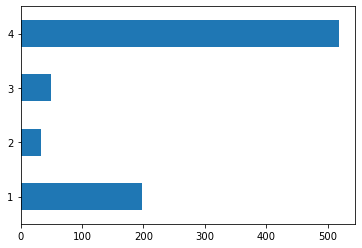

In [32]:
food_safety_srl_count=food_safety_srl['hfias_status'].value_counts()
food_safety_srl_count.sort_index().plot(kind='barh')#plot the rankings

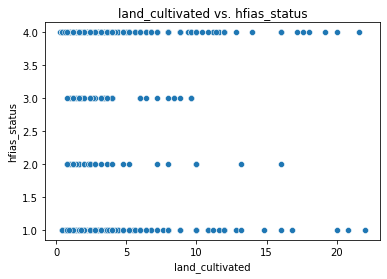

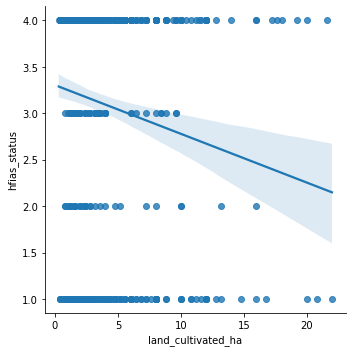

In [14]:
import seaborn as sns
ax=sns.scatterplot(x='land_cultivated_ha', y='hfias_status', data=food_safety_srl);
ax.set_title("land_cultivated vs. hfias_status")
ax.set_xlabel("land_cultivated");
sns.lmplot(x='land_cultivated_ha', y='hfias_status', data=food_safety_srl);

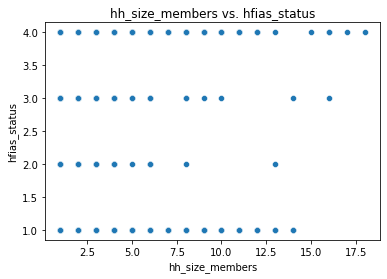

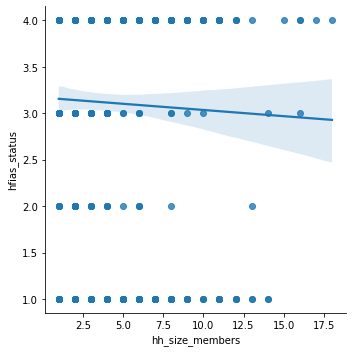

In [15]:
import seaborn as sns
ax1=sns.scatterplot(x='hh_size_members', y='hfias_status', data=food_safety_srl);
ax1.set_title("hh_size_members vs. hfias_status")
ax.set_xlabel("hh_size_members");
sns.lmplot(x='hh_size_members', y='hfias_status', data=food_safety_srl);

Text(0.5, 1.0, 'hfias_srl')

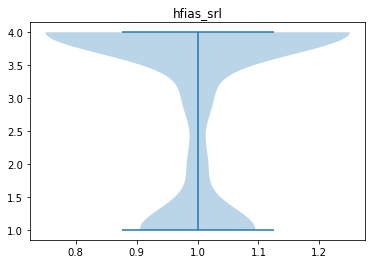

In [16]:
hfias_status_srl = food_safety_srl['hfias_status']
fig, ax = plt.subplots()
ax.violinplot([hfias_status_srl])
ax.set_title('hfias_srl')

                    hfias_status  hh_size_members  land_cultivated_ha
hfias_status            1.000000        -0.029673           -0.135486
hh_size_members        -0.029673         1.000000            0.116584
land_cultivated_ha     -0.135486         0.116584            1.000000


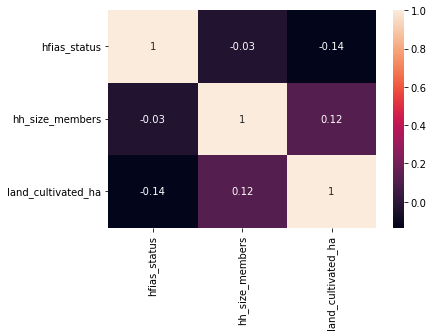

In [17]:
df_food_srl = pd.DataFrame(food_safety_srl,columns=['hfias_status','hh_size_members','land_cultivated_ha'])
corrMatrix_srl = df_food_srl.corr()
print (corrMatrix_srl) 
sns.heatmap(corrMatrix_srl, annot=True)
plt.show()

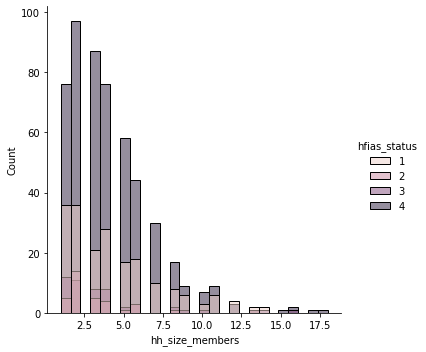

In [18]:
sns.displot(food_safety_srl, x="hh_size_members",hue="hfias_status")

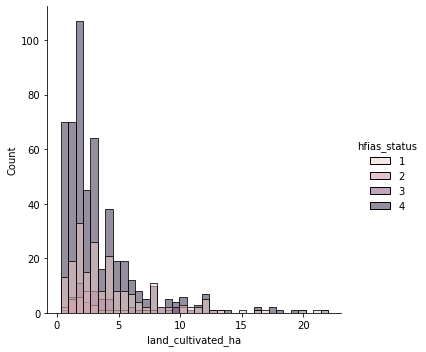

In [19]:
sns.displot(food_safety_srl, x="land_cultivated_ha",hue="hfias_status")

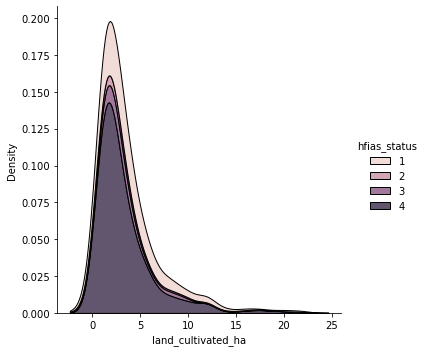

In [20]:
sns.displot(food_safety_srl, x="land_cultivated_ha", hue="hfias_status", kind="kde", multiple="stack")

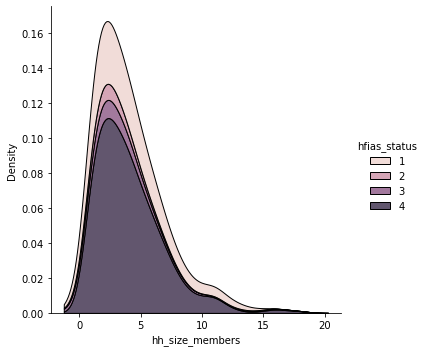

In [21]:
sns.displot(food_safety_srl, x="hh_size_members", hue="hfias_status", kind="kde", multiple="stack")

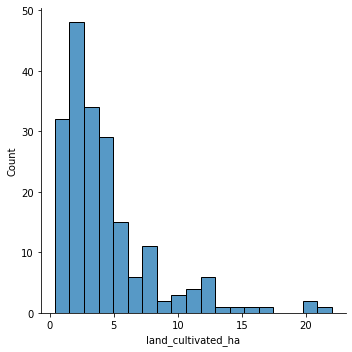

In [24]:
sns.displot(food_safety_srl.loc[food_safety_srl['hfias_status']==1] , x="land_cultivated_ha")

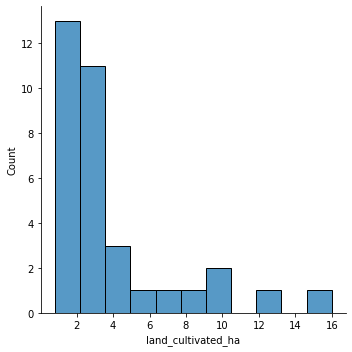

In [25]:
sns.displot(food_safety_srl.loc[food_safety_srl['hfias_status']==2] , x="land_cultivated_ha")

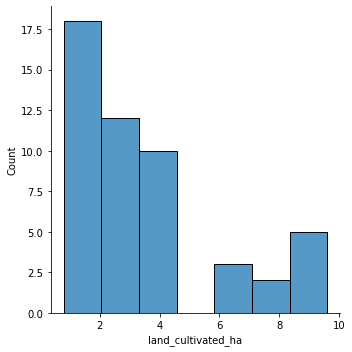

In [26]:
sns.displot(food_safety_srl.loc[food_safety_srl['hfias_status']==3] , x="land_cultivated_ha")

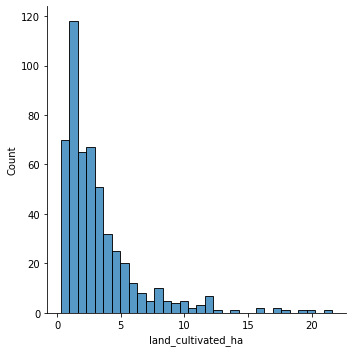

In [27]:
sns.displot(food_safety_srl.loc[food_safety_srl['hfias_status']==4] , x="land_cultivated_ha")

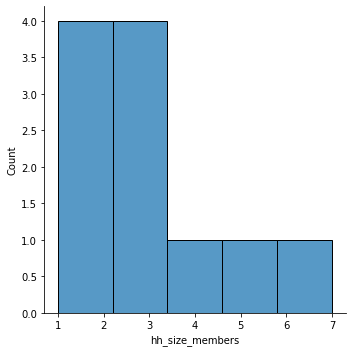

In [218]:
sns.displot(food_safety_srl.loc[food_safety_srl['land_cultivated_ha']==1] , x="hh_size_members")

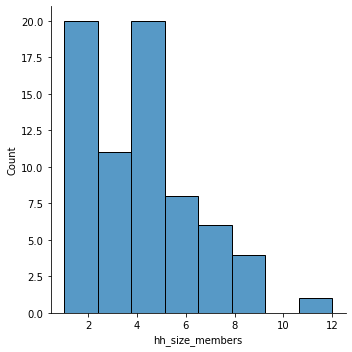

In [219]:
sns.displot(food_safety_srl.loc[food_safety_srl['land_cultivated_ha']==2] , x="hh_size_members")

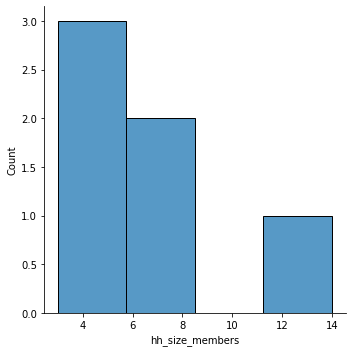

In [220]:
sns.displot(food_safety_srl.loc[food_safety_srl['land_cultivated_ha']==3] , x="hh_size_members")

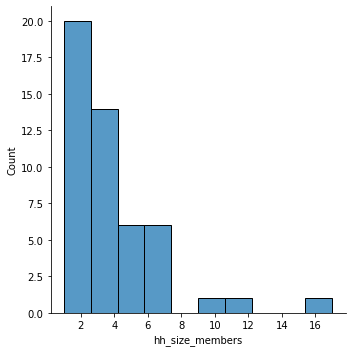

In [221]:
sns.displot(food_safety_srl.loc[food_safety_srl['land_cultivated_ha']==4] , x="hh_size_members")

In [222]:
food_safety_srl_1=food_safety_srl

In [223]:
food_safety_srl_1.drop(columns='id_country', inplace=True)
food_safety_srl_1.drop(columns='country', inplace=True)
food_safety_srl_1.drop(columns='id_proj', inplace=True)
food_safety_srl_1_1=pd.DataFrame(food_safety_srl_1,columns=["hfias_status","hh_size_members"])
food_safety_srl_1_2=pd.DataFrame(food_safety_srl_1,columns=["hfias_status","land_cultivated_ha"]) 

C:\Users\chenl\AppData\Local\Temp\ipykernel_4352\3988250709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_safety_srl_1.drop(columns='id_country', inplace=True)
C:\Users\chenl\AppData\Local\Temp\ipykernel_4352\3988250709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_safety_srl_1.drop(columns='country', inplace=True)
C:\Users\chenl\AppData\Local\Temp\ipykernel_4352\3988250709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [224]:
target = "hfias_status" #Select the data that we are going to use in the dataset
X = food_safety_srl_1_1.drop(columns=target)
y = food_safety_srl_1_1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=42)
lr_model= LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train_lr = lr_model.predict(X_train)
print('Linear Regression - Training Metrics')
print('MAE:', mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', mean_squared_error(y_train, y_pred_train_lr))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_pred_train_lr)))
print('R2:', cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=-1).mean())

Linear Regression - Training Metrics
MAE: 1.2222862650528383
MSE: 1.8121219510321942
RMSE: 1.3461507905996988
R2: -0.01800884654901158


In [225]:
target = "hfias_status" #Select the data that we are going to use in the dataset
X = food_safety_srl_1_2.drop(columns=target)
y = food_safety_srl_1_2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=42)
lr_model= LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train_lr = lr_model.predict(X_train)
print('Linear Regression - Training Metrics')
print('MAE:', mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', mean_squared_error(y_train, y_pred_train_lr))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_pred_train_lr)))
print('R2:', cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=-1).mean())

Linear Regression - Training Metrics
MAE: 1.1927852690035763
MSE: 1.753539787893765
RMSE: 1.3242128937197994
R2: -0.00707804475015692


In [226]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
target = "hfias_status" #Select the data that we are going to use in the dataset
X = food_safety_srl_1_2.drop(columns=target)
y = food_safety_srl_1_2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[:2])
regr.score(X_test, y_test)

0.004491499937035015